# Goal:

The goal of this project is to explore Quantum Computing and Quantum Machine Learning. We will use the Qiskit library to implement a Classifier to predict churn in a Telecom company.

# Installing dependencies

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_machine_learning
!pip install qiskit_ibm_runtime

# Data Overview

In [ ]:
import pandas as pd

train_set = pd.read_csv("/data/churn-bigml-80.csv")

test_set = pd.read_csv("/data/churn-bigml-20.csv")

In [ ]:
def display_data_summary(data_frame, name):
    print(f"*** {name} summary ***", end="\n\n")
    print("Number of rows:", data_frame.shape[0], end="\n\n")
    print("Number of features:", data_frame.shape[1], end="\n\n")
    print("Features names & types:")
    print(data_frame.dtypes, end="\n\n")
    print("Number of missing values:", data_frame.isnull().sum().values.sum(), end="\n\n")
    print("Number of Unique values:")
    print(data_frame.nunique())

In [ ]:
display_data_summary(train_set, "Train set")

*** Train set summary ***

Number of rows: 2666

Number of features: 20

Features names & types:
State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

Number of missing values: 0

Number of Unique values:
State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2

In [ ]:
display_data_summary(test_set, "Test set")

*** Test set summary ***

Number of rows: 667

Number of features: 20

Features names & types:
State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

Number of missing values: 0

Number of Unique values:
State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number

In [ ]:
train_set.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [ ]:
test_set.head()

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   
2             56.59              317.8               97             27.01   
3             18.77              137.3              102             11.67   
4             20.28              215.1              109             18.28   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   
2                160.6                128                7.23   
3                189.6                105                8.53   
4                178.7                 90                8.04   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   
2                 5.4                 9               1.46   
3                 7.7                 6               2.08   
4                11.1                 1               3.00   

   Customer service calls  Churn  
0                       1  False  
1                       4   True  
2                       4   True  
3                       2  False  
4                       1  False

In [ ]:
train_set.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.380000         165.300000        87.000000   
50%         101.000000         30.590000         200.900000       100.000000   
75%         114.000000         36.700000         235.100000       114.000000   
max         160.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       2666.000000          2666.000000        2666.000000   
mean          17.033072           201.168942         100.106152   
std            4.330864            50.780323          19.418459   
min            0.000000            43.700000          33.000000   
25%           14.050000           166.925000          87.000000   
50%           17.080000           201.150000         100.000000   
75%           19.980000           236.475000         113.000000   
max           30.910000           395.000000         166.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         2666.000000         2666.000000       2666.000000   
mean             9.052689           10.237022          4.467367   
std              2.285120            2.788349          2.456195   
min              1.970000            0.000000          0.000000   
25%              7.512500            8.500000          3.000000   
50%              9.050000           10.200000          4.000000   
75%             10.640000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        2666.000000             2666.000000  
mean            2.764490                1.562641  
std             0.752812                1.311236  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.750000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [ ]:
test_set.describe()

Account length   Area code  Number vmail messages  Total day minutes  \
count      667.000000  667.000000             667.000000         667.000000   
mean       102.841079  436.157421               8.407796         180.948126   
std         40.819480   41.783305              13.994480          55.508628   
min          1.000000  408.000000               0.000000          25.900000   
25%         76.000000  408.000000               0.000000         146.250000   
50%        102.000000  415.000000               0.000000         178.300000   
75%        128.000000  415.000000              20.000000         220.700000   
max        232.000000  510.000000              51.000000         334.300000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count       667.000000        667.000000         667.000000       667.000000   
mean        100.937031         30.761769         203.355322       100.476762   
std          20.396790          9.436463          49.719268        18.948262   
min          30.000000          4.400000          48.100000        37.000000   
25%          87.500000         24.860000         171.050000        88.000000   
50%         101.000000         30.310000         203.700000       101.000000   
75%         115.000000         37.520000         236.450000       113.000000   
max         165.000000         56.830000         361.800000       168.000000   

       Total eve charge  Total night minutes  Total night calls  \
count        667.000000           667.000000         667.000000   
mean          17.285262           199.685307         100.113943   
std            4.226160            49.759931          20.172505   
min            4.090000            23.200000          42.000000   
25%           14.540000           167.950000          86.000000   
50%           17.310000           201.600000         100.000000   
75%           20.095000           231.500000         113.500000   
max           30.750000           367.700000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count          667.000000          667.000000        667.000000   
mean             8.985907           10.238381          4.527736   
std              2.239429            2.807850          2.482442   
min              1.040000            0.000000          0.000000   
25%              7.560000            8.600000          3.000000   
50%              9.070000           10.500000          4.000000   
75%             10.420000           12.050000          6.000000   
max             16.550000           18.300000         18.000000   

       Total intl charge  Customer service calls  
count         667.000000              667.000000  
mean            2.764948                1.563718  
std             0.758167                1.333357  
min             0.000000                0.000000  
25%             2.320000                1.000000  
50%             2.840000                1.000000  
75%             3.255000                2.000000  
max             4.940000                8.000000

**Insight:** The two datasets do not have any missing values. The target variable is the 'Churn' column. The 'Churn' column is boolean, with 'True' indicating that the customer has churned and 'False' indicating that the customer has not churned.

# Exploratory Data Analysis

## Target label distribution

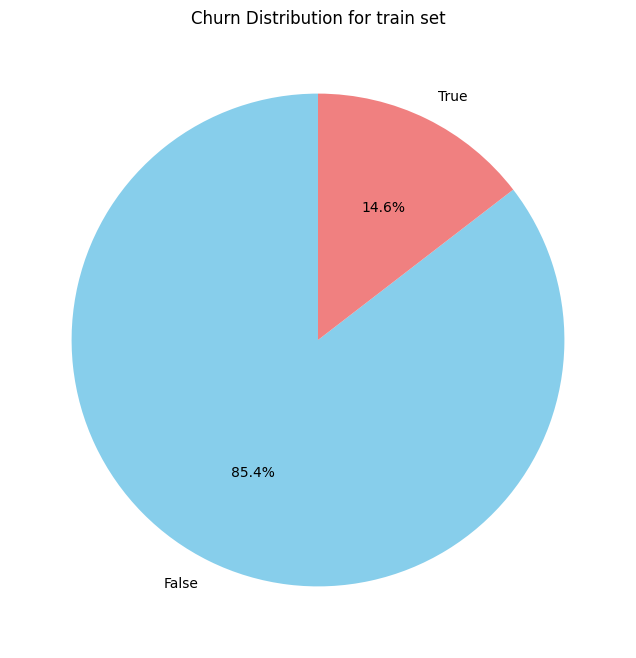

In [ ]:
import matplotlib.pyplot as plt

target_counts = train_set['Churn'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Churn Distribution for train set')
plt.show()

**Insight:** The target label is imbalanced. There are more customers who have not churned than customers who have churned.

## Features distribution

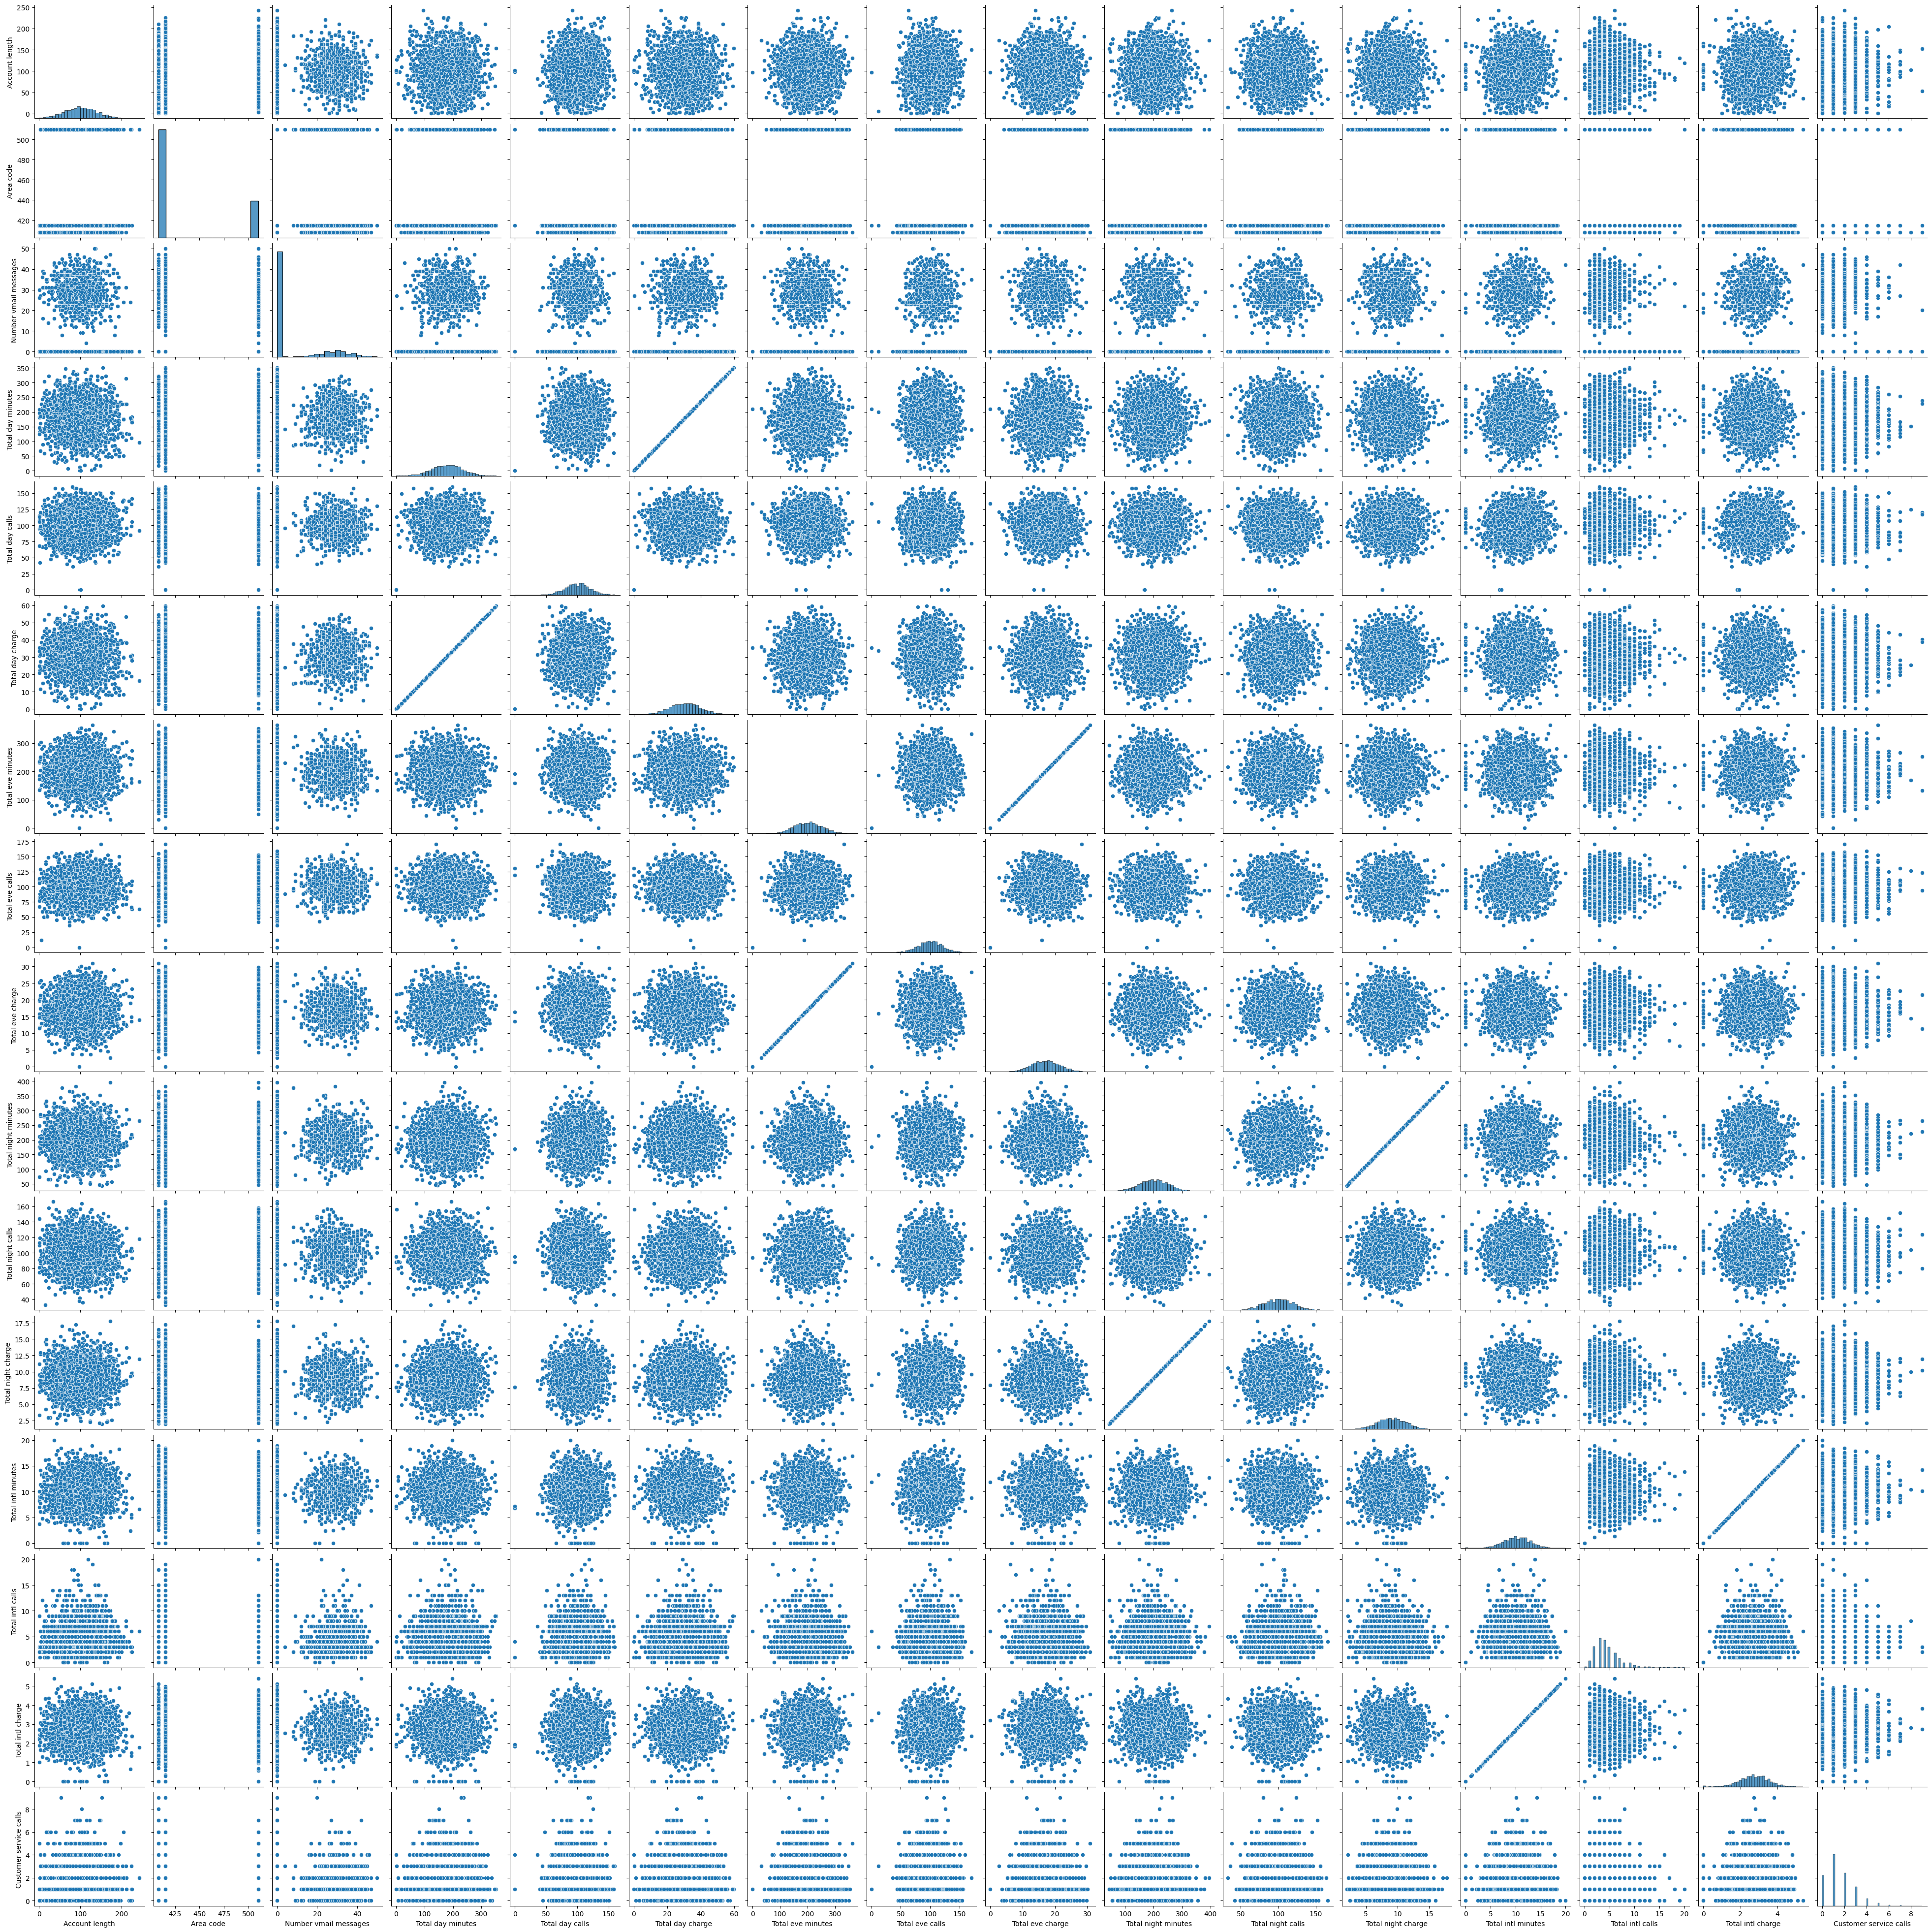

In [ ]:
import seaborn as sns

sns.pairplot(train_set.drop('Churn', axis=1))

plt.show()

**Insight:** The only correlated features are 'Total day minutes' and 'Total day charge', 'Total eve minutes' and 'Total eve charge', 'Total night minutes' and 'Total night charge', and 'Total intl minutes' and 'Total intl charge'. This is expected since the charge is calculated based on the minutes.

# Pre-processing

## Feature Selection

The size of the resulting Quantum circuit is proportional to the number of features and is limited by the number of qubits. Therefore, we will select the most important features to use in the Quantum Classifier.

In [ ]:
from sklearn.preprocessing import LabelEncoder


X = train_set.drop(columns=['Churn']).copy()
y = train_set['Churn'].copy()

non_numeric_columns = X.select_dtypes(exclude=['number']).columns

non_numeric_columns

Index(['State', 'International plan', 'Voice mail plan'], dtype='object')

Some of the features do not have the right encoding for the estimator that we will use for recursive feature elimination (RFE). For example 'International plan' and 'Voice mail plan' are encoded as 'yes' and 'no'. We will encode them as 1 and 0 respectively. 'State' is a categorical feature and we will use label encoding to encode it.

In [ ]:
X['International plan'] = X['International plan'].map({'No': 0, 'Yes': 1})
X['Voice mail plan'] = X['Voice mail plan'].map({'No': 0, 'Yes': 1})

label_encoder = LabelEncoder()
X['State'] = label_encoder.fit_transform(X['State'])

X[non_numeric_columns].head()

State  International plan  Voice mail plan
0     16                   0                1
1     35                   0                1
2     31                   0                0
3     35                   1                0
4     36                   1                0

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42)

selector = RFE(estimator=rfc, n_features_to_select=4, step=1)
selector.fit(X, y)

selected_features = selector.get_feature_names_out()

In [ ]:
y_train = train_set['Churn'].astype(int).values

X_train = train_set[selected_features].copy()


y_test = test_set['Churn'].astype(int).values

X_test = test_set[selected_features].copy()

## Normalization

The Quantum Classifier is sensitive to the scale of the features. Therefore, we will normalize the features.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

pd.DataFrame(X_train, columns=train_set[selected_features].columns).describe()

Total day minutes  Total day charge  Total eve minutes  \
count        2666.000000       2666.000000        2666.000000   
mean            0.511635          0.511610           0.550966   
std             0.154533          0.154523           0.140092   
min             0.000000          0.000000           0.000000   
25%             0.408780          0.408786           0.454495   
50%             0.512970          0.512911           0.552378   
75%             0.615450          0.615359           0.646412   
max             1.000000          1.000000           1.000000   

       Total eve charge  
count       2666.000000  
mean           0.551054  
std            0.140112  
min            0.000000  
25%            0.454545  
50%            0.552572  
75%            0.646393  
max            1.000000

In [ ]:
X_test = scaler.fit_transform(X_test)

pd.DataFrame(X_test, columns=test_set[selected_features].columns).describe()

Total day minutes  Total day charge  Total eve minutes  \
count         667.000000        667.000000         667.000000   
mean            0.502750          0.502799           0.494917   
std             0.179989          0.179982           0.158493   
min             0.000000          0.000000           0.000000   
25%             0.390240          0.390235           0.391935   
50%             0.494163          0.494183           0.496015   
75%             0.631647          0.631699           0.600414   
max             1.000000          1.000000           1.000000   

       Total eve charge  
count        667.000000  
mean           0.494946  
std            0.158521  
min            0.000000  
25%            0.391973  
50%            0.495874  
75%            0.600338  
max            1.000000

## Amplitude Encoding (state prep)

### Feature map

Our data is in the classical format, meaning it is in bits, however we need to convert it to qubits. We will use the feature map to do this.

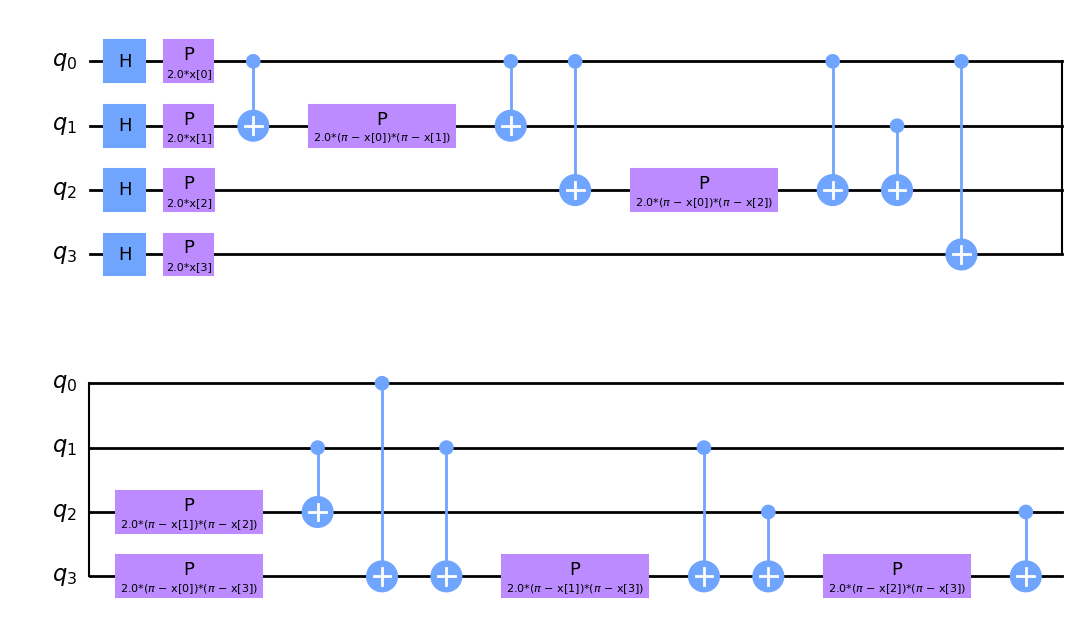

In [ ]:
from qiskit.circuit.library import ZZFeatureMap

n_features = X_train.shape[1]

feature_map = ZZFeatureMap(feature_dimension=n_features, reps=1)

feature_map.decompose().draw(output="mpl", style="clifford", fold=15)

### Ansatz

it is essential to implement a parameterized quantum circuit, which closely resembles the layers found in conventional neural networks. This circuit incorporates a collection of adjustable parameters or weights, which are fine-tuned to minimize a specified objective function.

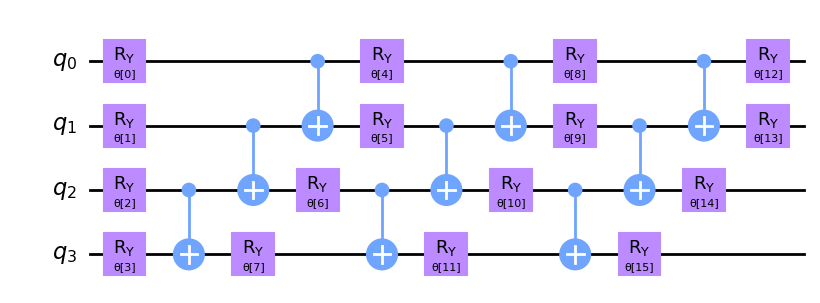

In [ ]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=n_features, reps=3)

ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

# Quantum Modeling

### Optimization algorithm

In [ ]:
from qiskit.algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=50)

## Runtime environment

We will use the IBM Quantum Experience to run our Quantum Classifier, which is a cloud-based quantum computing platform. You need to create an account, and provide your API token to use it.

We will use the statevector simulator to run our Quantum Classifier.

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel='ibm_quantum',
    token='YOURAPI_KEY',
    overwrite=True)

service = QiskitRuntimeService(channel='ibm_quantum')

backend = service.backend('simulator_statevector')

In [ ]:
from qiskit_ibm_runtime import Sampler

sampler = Sampler(backend)

## Helper functions

In [ ]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func = []

def plot_obj_func(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func.append(obj_func_eval)
    plt.plot(range(len(objective_func)), objective_func)
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.title("Objective function according to iteration")
    plt.show()

## Model Training

The model is trained using the Quantum Circuit and the Quantum Variational Classifier.

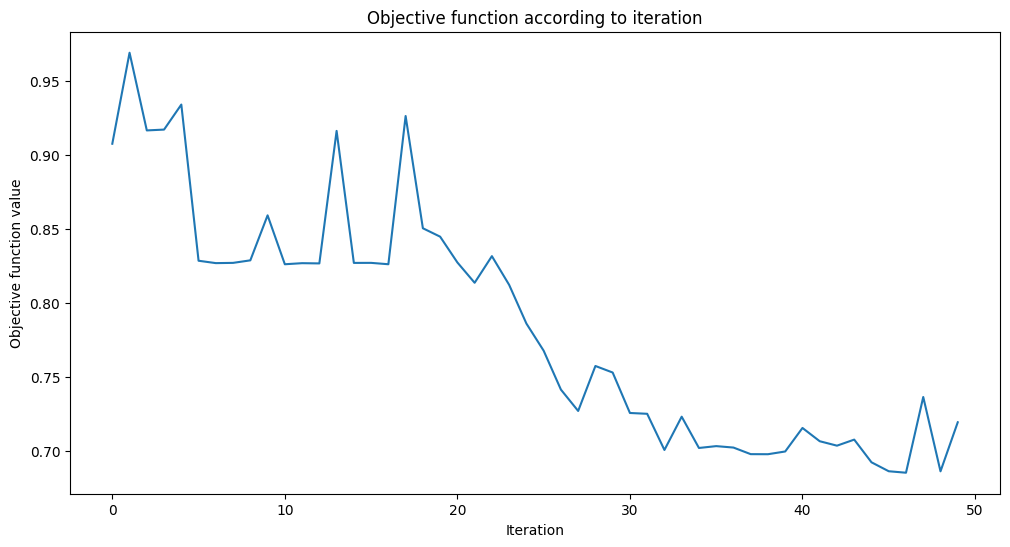

Training time: 11226 seconds


In [ ]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(sampler=sampler, feature_map=feature_map, ansatz=ansatz, optimizer=optimizer, callback=plot_obj_func)

objective_func = []

start = time.time()

vqc.fit(X_train, y_train)

end = time.time()

duration = end - start

print(f"Training time: {round(duration)} seconds")

## Model Evaluation

In [ ]:
train_score = vqc.score(X_train, y_train)
test_score = vqc.score(X_test, y_test)

print(f"Train score: {train_score:.2f}")
print(f"Test score:  {test_score:.2f}")

Train score: 0.85
Test score:  0.85


**Insight:** The Quantum Classifier has a high accuracy.

# Classical Modeling

Let's compare the Quantum Classifier with a classical classifier. We will use the Multi-layer Perceptron (MLP) Classifier.

## Model Training

In [ ]:
import time
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, max_iter=100)

start = time.time()

mlp.fit(X_train, y_train)

end = time.time()

duration = end - start

print(f"Training time: {round(duration)} seconds")


Training time: 4 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## Model Evaluation

In [ ]:
train_score = mlp.score(X_train, y_train)
test_score = mlp.score(X_test, y_test)

print(f"Train score: {train_score:.2f}")
print(f"Test score:  {test_score:.2f}")

Train score: 0.86
Test score:  0.87


**Insight:** The Quantum Classifier has a similar accuracy to the MLP Classifier. This is impressive since the Quantum Classifier is trained on a statevector simulator, while the MLP Classifier is trained on a classical computer.